In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn import metrics

Rozważmy zbiór Boston

In [2]:
boston = datasets.load_boston()

In [3]:
# get the data
boston_X = boston.data
boston_Y = boston.target

Podzielmy zbiór na część testową i treningową .

In [4]:
# Split the data into training/testing sets
boston_X_train = boston_X[:-50]
boston_X_test = boston_X[-50:]
 
# Split the targets into training/testing sets
boston_y_train = boston_Y[:-50]
boston_y_test = boston_Y[-50:]

In [5]:
X = boston_X_train
y = boston_y_train

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy.


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed)

In [8]:
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5],
                    'elasticnet__alpha': [0.001, 0.01, 0.1, 1, 10]},
                    cv=kfold,
                    refit=True,
                    n_jobs=-1)
grid_1.fit(X, y)
grid_1.best_params_

{'elasticnet__alpha': 1, 'polynomialfeatures__degree': 1}

In [9]:
grid_1.cv_results_['mean_test_score'].reshape(5, -1);

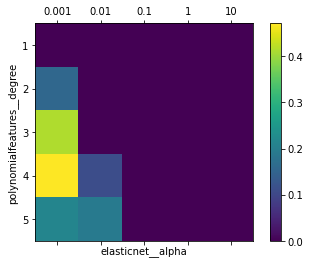

In [28]:
grid_1_degree = ['1', '2', '3', '4', '5'] 
grid_1_alpha = ['0.001', '0.01', '0.1', '1', '10']
 
figure = plt.figure() 
axes = figure.add_subplot(111) 

caxes = axes.matshow(grid_1.cv_results_['mean_test_score'].reshape(5, -1), vmin=0) 
figure.colorbar(caxes) 
  
axes.set_xticklabels(['']+grid_1_alpha) 
axes.set_yticklabels(['']+grid_1_degree) 

plt.xlabel("elasticnet__alpha")
plt.ylabel("polynomialfeatures__degree")
  
plt.show() 

In [11]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=0.1)),
                   param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5],
                               'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]},
                   cv=kfold,
                   refit=True,
                   n_jobs=-1)
grid_2.fit(X, y)
grid_2.best_params_

{'lasso__alpha': 1, 'polynomialfeatures__degree': 1}

In [12]:
grid_2.cv_results_['mean_test_score'].reshape(5, -1);

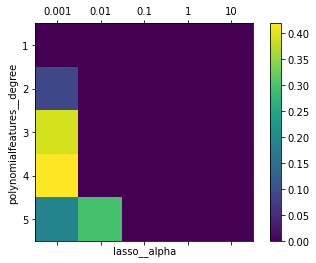

In [29]:
grid_2_degree = ['1', '2', '3', '4', '5'] 
grid_2_alpha = ['0.001', '0.01', '0.1', '1', '10']
 
figure = plt.figure() 
axes = figure.add_subplot(111) 

caxes = axes.matshow(grid_2.cv_results_['mean_test_score'].reshape(5, -1), vmin=0) 
figure.colorbar(caxes) 
  
axes.set_xticklabels(['']+grid_2_alpha) 
axes.set_yticklabels(['']+grid_2_degree) 

plt.xlabel("lasso__alpha")
plt.ylabel("polynomialfeatures__degree")
  
plt.show() 

In [14]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=0.1)),
                   param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7],
                               'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                   cv=kfold,
                   refit=True,
                   n_jobs=-1)
grid_3.fit(X, y)
grid_3.best_params_

{'polynomialfeatures__degree': 1, 'ridge__alpha': 100}

In [15]:
grid_3.cv_results_['mean_test_score'].reshape(7, -1);

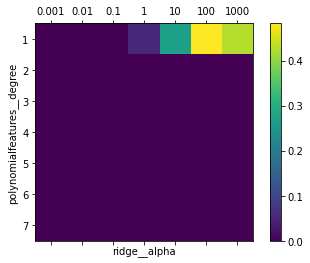

In [30]:
grid_3_degree = ['1', '2', '3', '4', '5', '6', '7'] 
grid_3_alpha = ['0.001', '0.01', '0.1', '1', '10', '100', '1000']
 
figure = plt.figure() 
axes = figure.add_subplot(111) 

caxes = axes.matshow(grid_3.cv_results_['mean_test_score'].reshape(7, -1), vmin=0) 
figure.colorbar(caxes) 
  
axes.set_xticklabels(['']+grid_3_alpha) 
axes.set_yticklabels(['']+grid_3_degree) 

plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
  
plt.show() 

In [17]:
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7]},
                    cv=kfold,
                    refit=True,
                    n_jobs=-1)
grid_4.fit(X, y)
grid_4.best_params_

{'polynomialfeatures__degree': 1}

In [46]:
tmp = np.diag(grid_4.cv_results_['mean_test_score'])

In [47]:
tmp[tmp==0]=min(grid_4.cv_results_['mean_test_score'])
tmp

array([[-2.00891958e-01, -1.67797589e+07, -1.67797589e+07,
        -1.67797589e+07, -1.67797589e+07, -1.67797589e+07,
        -1.67797589e+07],
       [-1.67797589e+07, -1.66208715e+02, -1.67797589e+07,
        -1.67797589e+07, -1.67797589e+07, -1.67797589e+07,
        -1.67797589e+07],
       [-1.67797589e+07, -1.67797589e+07, -5.26245804e+06,
        -1.67797589e+07, -1.67797589e+07, -1.67797589e+07,
        -1.67797589e+07],
       [-1.67797589e+07, -1.67797589e+07, -1.67797589e+07,
        -8.28277836e+06, -1.67797589e+07, -1.67797589e+07,
        -1.67797589e+07],
       [-1.67797589e+07, -1.67797589e+07, -1.67797589e+07,
        -1.67797589e+07, -3.87852255e+06, -1.67797589e+07,
        -1.67797589e+07],
       [-1.67797589e+07, -1.67797589e+07, -1.67797589e+07,
        -1.67797589e+07, -1.67797589e+07, -9.04181517e+06,
        -1.67797589e+07],
       [-1.67797589e+07, -1.67797589e+07, -1.67797589e+07,
        -1.67797589e+07, -1.67797589e+07, -1.67797589e+07,
        -1.6779758

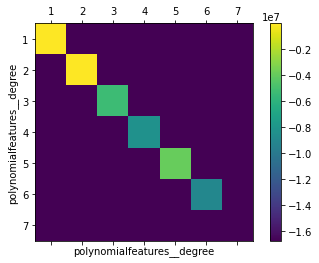

In [49]:
grid_4_degree = ['1', '2', '3', '4', '5', '6', '7']
 
figure = plt.figure() 
axes = figure.add_subplot(111) 

caxes = axes.matshow(tmp, vmin=min(grid_4.cv_results_['mean_test_score'])) 
figure.colorbar(caxes) 
  
axes.set_xticklabels(['']+grid_4_degree) 
axes.set_yticklabels(['']+grid_4_degree) 

plt.xlabel("polynomialfeatures__degree")
plt.ylabel("polynomialfeatures__degree")
  
plt.show() 

In [50]:
from sklearn import  metrics

X_test=boston_X_test
y_test=boston_y_test

models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

ElasticNet
R^2: 0.26209780598926524
Explained variance score: 0.2625203248283122
Median absolute error: 2.0372732498523387
Mean squared error: 13.918975295405088
Mean absolute errors: 2.7860251774001714
Lasso
R^2: 0.2945970264429165
Explained variance score: 0.29469272114054046
Median absolute error: 1.9355672663158607
Mean squared error: 13.305945749909911
Mean absolute errors: 2.7136637564664916
Ridge
R^2: 0.2615522704535955
Explained variance score: 0.2631176513729566
Median absolute error: 2.117506309383142
Mean squared error: 13.929265677660874
Mean absolute errors: 2.825277648734166
LR
R^2: 0.41894349864428937
Explained variance score: 0.42197364717960884
Median absolute error: 2.089049047357058
Mean squared error: 10.960410679422635
Mean absolute errors: 2.5372525352164024


In [51]:
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['ElasticNet', 'Lasso', 'Ridge', 'LR'])
df

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,ElasticNet,0.262098,0.262520,2.037273,13.918975,2.786025
1,Lasso,0.294597,0.294693,1.935567,13.305946,2.713664
2,Ridge,0.261552,0.263118,2.117506,13.929266,2.825278
3,LR,0.418943,0.421974,2.089049,10.960411,2.537253
